## Loading Library

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates

## Rangga Rijasa - 0706022210019



# **A Day in the Life of a Data Analyst: Unraveling Insights from The Bread Basket Dataset**

---

**Thursday, December 5, 2024** <br>
As the sun rises on another busy Thursday, I settle into my workspace, ready to dive into The Bread Basket dataset. This dataset is a treasure trove of information, capturing the essence of customer transactions at a local bakery. My goal today is to uncover insights that can help the bakery optimize its offerings and enhance customer satisfaction.


## **Loading Dataset**
I start my day by loading the dataset into my Python environment. Yesterday, I got the dataset from my [Client](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv). Using Pandas, I import the data and take a moment to familiarize myself with its structure.

In [26]:
#1
df = pd.read_csv('https://raw.githubusercontent.com/RanggaRijasa/DataMining2024/refs/heads/main/bread%20basket.csv')
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


As I glance through the initial rows, I see the columns: Transaction, Item, date_time, period_day, and weekday_weekend. Each transaction is unique, and I can already sense the potential insights hidden within.

## **Exploratory Data Analysis (EDA)**
With the dataset loaded, I transition into Exploratory Data Analysis (EDA). This phase is crucial for understanding the data better and identifying patterns.
### **Data Overview**
I begin by checking for missing values and summarizing the basic statistics of the dataset.

In [27]:
#2 info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [28]:
#3 check missing values
df.isnull().sum()

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

4. The overview reveals a _________________________. (fill that blank on the section below)

The overview reveals a dataset that does not have any missing or null values.

### **Transaction Trends**
Next, I analyze transaction trends over time. I extract the date and hour from the date_time column to see how customer purchases vary throughout the day and week. Then, I visualize the daily transaction trends to identify peak days and times for customer activity.

C:\Users\Rangga R\AppData\Local\Temp\ipykernel_16376\1443606712.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date_time']).dt.date
C:\Users\Rangga R\AppData\Local\Temp\ipykernel_16376\1443606712.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['hour'] = pd.to_datetime(df['date_time']).dt.hour


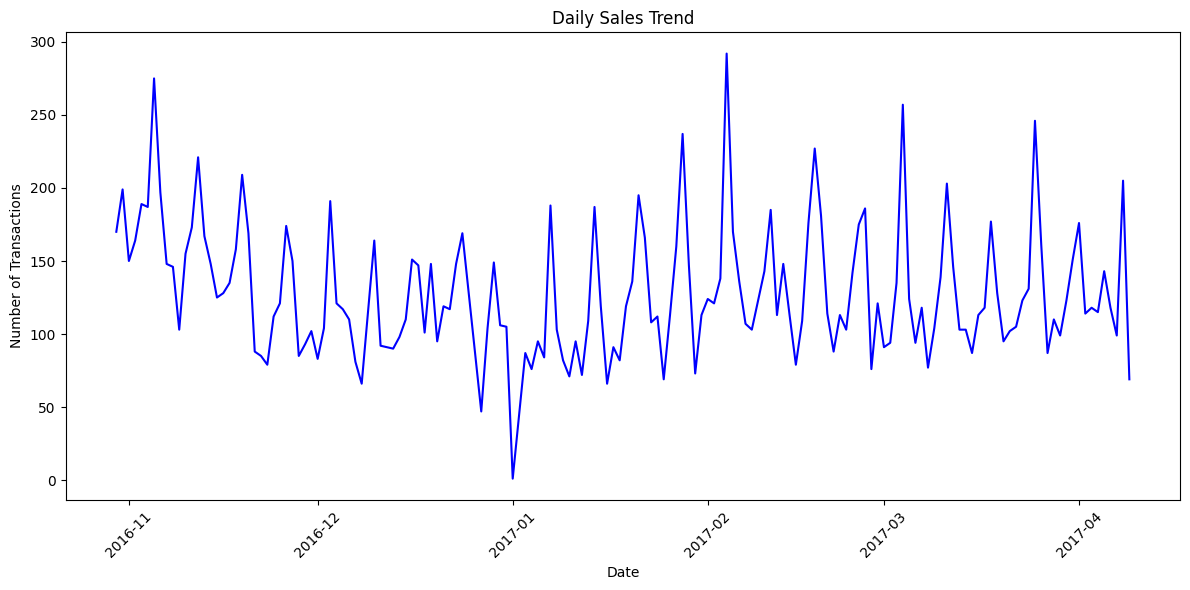

In [29]:
df['date'] = pd.to_datetime(df['date_time']).dt.date
df['hour'] = pd.to_datetime(df['date_time']).dt.hour


# Aggregate data: Count transactions per day
daily_sales = df.groupby('date').size()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, label='Transactions', linestyle='-', marker='', color='blue')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Daily Sales Trend')

# Format the x-axis for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


Oh my God, it's so difficult to get insights from this visualization, but it seems like there might be a trend to uncover. Let me try separating it by the perspective of hour, time, day, day_name, month, and year by adding each of those variabels into the dataframe.

In [30]:
# 6
df['day'] = pd.to_datetime(df['date_time']).dt.day
df['month'] = pd.to_datetime(df['date_time']).dt.month
df['year'] = pd.to_datetime(df['date_time']).dt.year
df['time'] = pd.to_datetime(df['date_time']).dt.time
df['hour'] = pd.to_datetime(df['date_time']).dt.hour
df['day_name'] = pd.to_datetime(df['date_time']).dt.day_name()

df.drop('date', axis=1, inplace=True)

df.sample(5)

C:\Users\Rangga R\AppData\Local\Temp\ipykernel_16376\498052898.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['day'] = pd.to_datetime(df['date_time']).dt.day
C:\Users\Rangga R\AppData\Local\Temp\ipykernel_16376\498052898.py:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['month'] = pd.to_datetime(df['date_time']).dt.month
C:\Users\Rangga R\AppData\Local\Temp\ipykernel_16376\498052898.py:4: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['year'] = pd.to_datetime(df['date_time']).dt.year
C:\Users\Rangga R\AppData\Local\Temp\ipykernel_16376\498052898.py:5: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when d

,Transaction,Item,date_time,period_day,weekday_weekend,hour,day,month,year,time,day_name
9511,4770,Tea,15-01-2017 16:10,afternoon,weekend,16,15,1,2017,16:10:00,Sunday
8712,4378,Bread,08-01-2017 12:31,afternoon,weekend,12,8,1,2017,12:31:00,Sunday
9929,4978,Bread,20-01-2017 12:20,afternoon,weekday,12,20,1,2017,12:20:00,Friday
10364,5179,Smoothies,22-01-2017 15:59,afternoon,weekend,15,22,1,2017,15:59:00,Sunday
19245,9111,Coffee,31-03-2017 11:23,morning,weekday,11,31,3,2017,11:23:00,Friday



Alright, now I can easily create a visualization of monthly sales.

C:\Users\Rangga R\AppData\Local\Temp\ipykernel_16376\2960404818.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date_time'])


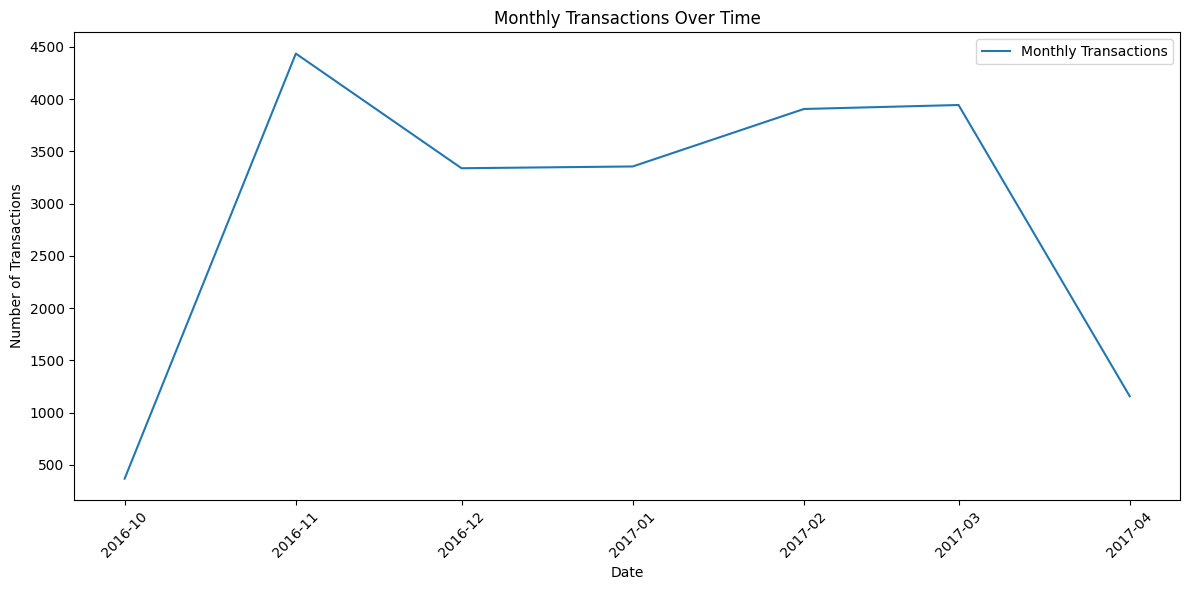

In [31]:
# 7
df['date'] = pd.to_datetime(df['date_time'])

monthly_transactions = df.groupby(['year', 'month']).size()

monthly_transactions = monthly_transactions.reset_index(name='Transaction Count')

monthly_transactions['date'] = pd.to_datetime(
    monthly_transactions[['year', 'month']].assign(Day=1)
)

plt.figure(figsize=(12, 6))
plt.plot(monthly_transactions['date'], monthly_transactions['Transaction Count'], label='Monthly Transactions')

plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Monthly Transactions Over Time')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

8. Now, the visualization above provides better insights: _________________________. (fill that blank on the section below)

Now, the visualization above provides better insights on how the sales/total transactions vary from month to month

Next, I want to see if there's a trend for each day of the week in each month.
Oh, the dataframe has a column called weekday_weekend. What days include weekends and weekdays??

In [59]:
#9

weekdays = df[df['weekday_weekend'] == 'weekday']
weekends = df[df['weekday_weekend'] == 'weekend']

# Get unique day names for weekdays and weekends
unique_weekdays = weekdays['day_name'].unique()
unique_weekends = weekends['day_name'].unique()

# Output the results
print("Unique weekday names:", unique_weekdays)
print("Unique weekend names:", unique_weekends)

Unique weekday names: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
Unique weekend names: ['Sunday' 'Saturday']



Oh, okay, now I know that "weekend" refers to Sunday and Saturday. Alright, moving on, before creating the visualization, it seems necessary to create an aggregation with the columns for the month and day name, where the values represent the total transactions that occurred.

In [33]:
#10
monthly_dayname_sales = df.groupby(['month', 'day_name']).size().reset_index(name='total_sales')

# Pivot the table to make 'day_name' the columns and 'month' the index
pivot_table = monthly_dayname_sales.pivot(index='month', columns='day_name', values='total_sales').fillna(0)

# Define the correct order for the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reorder the columns based on the day_order
pivot_table = pivot_table[day_order]

pivot_table

day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
month,,,,,,,
1,329.0,474.0,322.0,399.0,489.0,807.0,536.0
2,474.0,429.0,419.0,456.0,599.0,879.0,650.0
3,379.0,433.0,459.0,557.0,674.0,883.0,559.0
4,118.0,115.0,143.0,118.0,99.0,381.0,183.0
10,199.0,0.0,0.0,0.0,0.0,0.0,170.0
11,469.0,599.0,576.0,591.0,639.0,879.0,683.0
12,356.0,342.0,402.0,525.0,624.0,776.0,314.0


11. Wow, it turns out the insight that can be gained from the table above is _____

Wow, it turns out the insight that can be gained from the table above is:
- Peak Transaction Days
- Weekday Patterns
- Seasonal Changes
- Month-to-Month Variations
- Customer Behavior Trends


It seems ready to create the visualization now. Okay, I will create a comparison visualization of total sales per day for each month.

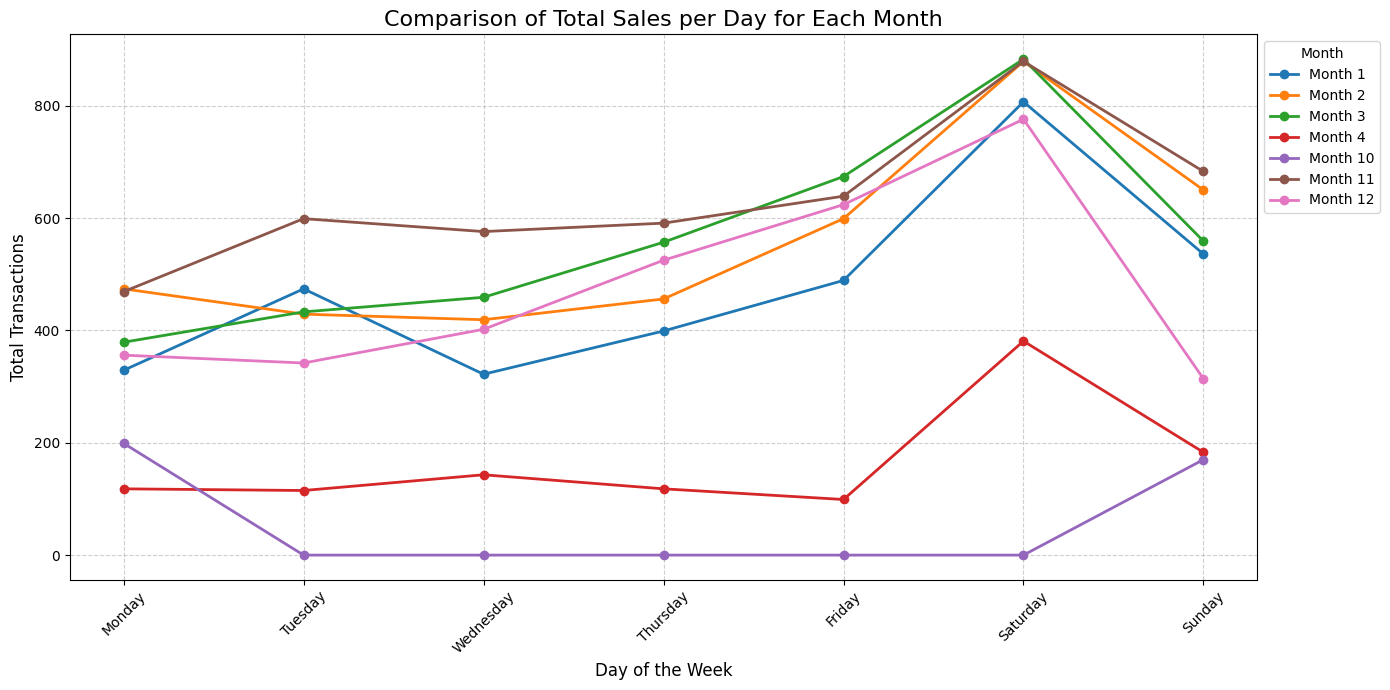

In [34]:
import matplotlib.pyplot as plt

# Transpose the pivot table so that the days of the week are on the x-axis
pivot_table_t = pivot_table.T

# Plot the line chart
plt.figure(figsize=(14, 7))

# Plot each month's data as a line, where the x-axis is the day of the week
for month in pivot_table_t.columns:
    plt.plot(pivot_table_t.index, pivot_table_t[month], marker='o', label=f'Month {month}', linewidth=2, markersize=6)

# Add title and labels
plt.title('Comparison of Total Sales per Day for Each Month', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Transactions', fontsize=12)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Add a legend to show which line corresponds to which month
plt.legend(title='Month', loc='upper left', bbox_to_anchor=(1, 1))

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Adjust layout to fit everything
plt.tight_layout()

# Show the plot
plt.show()


13. Wow, after visualizing it like this, I can gain insights into the sales trends that ____.

Wow, after visualizing it like this, I can gain insights into the sales trends that:
- Weekday Sales Trends
- Monthly Sales Patterns
- Seasonal Fluctuations
- Day-Specific Trends
- Holiday or Promotional Effects

Oh, it turns out there's also a "period_day" column in the dataframe, but at the beginning, I only noticed "morning." Hmm, I'm curious, what other unique values could there be?

In [37]:
# 14
unique_periods = df['period_day'].unique()

# Print the unique values
print(unique_periods)

['morning' 'afternoon' 'evening' 'night']


Oh, okay, there are "morning," "afternoon," "evening," and "night."
But, but, but, what are the time ranges for morning, afternoon, evening, and night? Let me try to find out.

In [39]:
# 15
# Create a new column for the hour of the day
df['hour'] = pd.to_datetime(df['date_time']).dt.hour

# Separate the hours into different periods based on your expected ranges
morning_hours = df[df['period_day'] == 'morning']['hour'].unique()
afternoon_hours = df[df['period_day'] == 'afternoon']['hour'].unique()
evening_hours = df[df['period_day'] == 'evening']['hour'].unique()
night_hours = df[df['period_day'] == 'night']['hour'].unique()

# Print the unique hours for each period
print(f"Unique morning hours: {sorted(morning_hours)}")
print(f"Unique afternoon hours: {sorted(afternoon_hours)}")
print(f"Unique evening hours: {sorted(evening_hours)}")
print(f"Unique night hours: {sorted(night_hours)}")


Unique morning hours: [1, 7, 8, 9, 10, 11]
Unique afternoon hours: [12, 13, 14, 15, 16]
Unique evening hours: [17, 18, 19, 20]
Unique night hours: [21, 22, 23]


C:\Users\Rangga R\AppData\Local\Temp\ipykernel_16376\2557416647.py:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['hour'] = pd.to_datetime(df['date_time']).dt.hour


16. Hah, I found something odd in the results above. Did you notice it too? What do you think is odd about it and why?

inclusion of "1" in the unique morning hours. because 1 in the hour column corresponds to 1 AM, which is generally considered night rather than morning.

In [42]:
print(df.columns)
df['day_name'] = pd.to_datetime(df['date_time']).dt.day_name()

# Verify if 'day_name' column is added
print(df.head())

Index(['Transaction', 'Item', 'date_time', 'period_day', 'weekday_weekend',
       'hour', 'day', 'month', 'year', 'time', 'day_name', 'date'],
      dtype='object')
   Transaction           Item         date_time period_day weekday_weekend  \
0            1          Bread  30-10-2016 09:58    morning         weekend   
1            2   Scandinavian  30-10-2016 10:05    morning         weekend   
2            2   Scandinavian  30-10-2016 10:05    morning         weekend   
3            3  Hot chocolate  30-10-2016 10:07    morning         weekend   
4            3            Jam  30-10-2016 10:07    morning         weekend   

   hour  day  month  year      time day_name                date  
0     9   30     10  2016  09:58:00   Sunday 2016-10-30 09:58:00  
1    10   30     10  2016  10:05:00   Sunday 2016-10-30 10:05:00  
2    10   30     10  2016  10:05:00   Sunday 2016-10-30 10:05:00  
3    10   30     10  2016  10:07:00   Sunday 2016-10-30 10:07:00  
4    10   30     10  2016  10:

C:\Users\Rangga R\AppData\Local\Temp\ipykernel_16376\152618624.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['day_name'] = pd.to_datetime(df['date_time']).dt.day_name()



But that's okay, I'll just continue exploring the insights. It seems like I can create a sales analysis based on the hours of each day here.

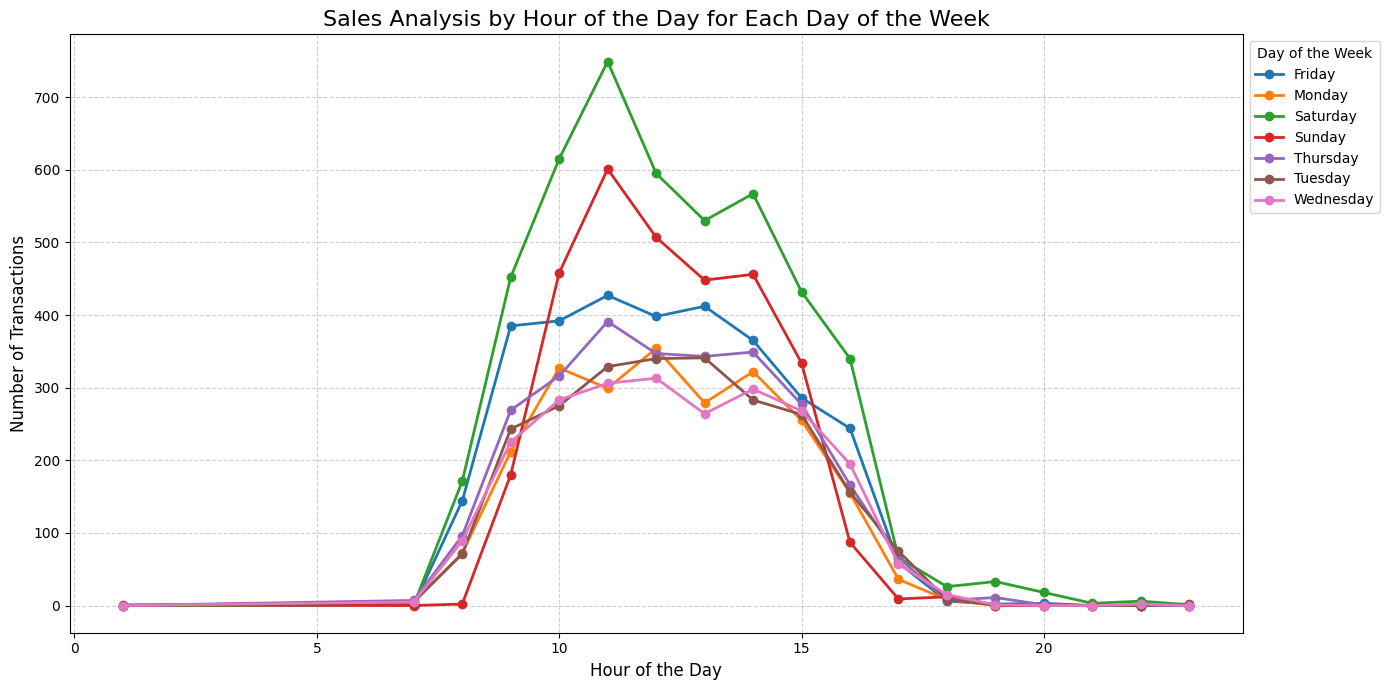

In [44]:
# 17
import matplotlib.pyplot as plt

# Aggregate the total number of transactions by hour for each day of the week
sales_by_hour = df.groupby(['hour', 'day_name']).size().unstack(fill_value=0)

# Plot the line chart for each day
plt.figure(figsize=(14, 7))

for day in sales_by_hour.columns:
    plt.plot(sales_by_hour.index, sales_by_hour[day], marker='o', label=day, linewidth=2, markersize=6)

# Add title and labels
plt.title('Sales Analysis by Hour of the Day for Each Day of the Week', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Add a legend for the days of the week
plt.legend(title='Day of the Week', loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to ensure everything fits
plt.tight_layout()

# Show the plot
plt.show()


18. The daily sales trend plot reveals that _______

The daily sales trend plot reveals that:
- Morning Peak for Some Days
- Afternoon Increase
- Evening Drop or Stability
- Nighttime Activity

### **Item Popularity**
Curious about which items are most popular, I analyze the frequency of orders for each item.

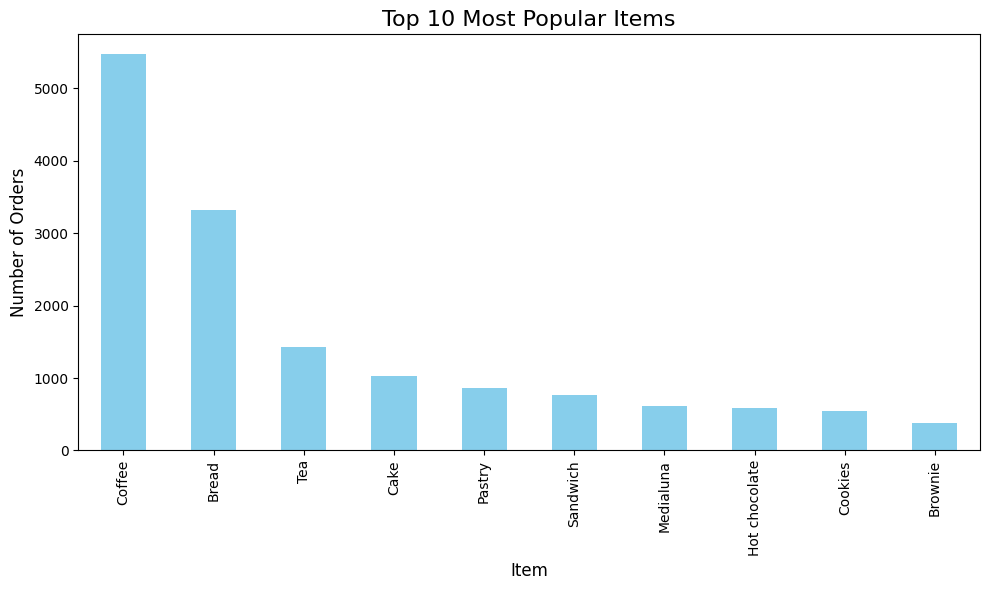

In [54]:
# Count the number of orders for each item
item_counts = df['Item'].value_counts()

# Get the top 10 most popular items
top_10_items = item_counts.head(10)

# Plot the bar chart for top 10 items
plt.figure(figsize=(10, 6))
top_10_items.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Top 10 Most Popular Items', fontsize=16)
plt.xlabel('Item', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


Hmm, but this is overall data. I want to create a visualization by period instead, maybe the highest sales vary by period.

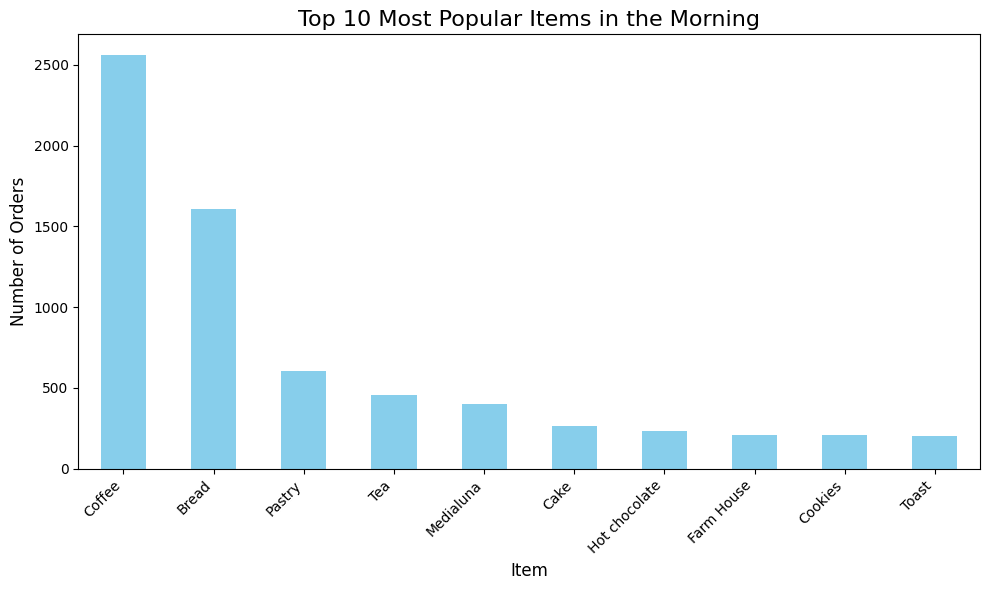

In [47]:
# Filter data for the 'morning' period
morning_sales = df[df['period_day'] == 'morning']

# Count the frequency of orders for each item in the morning
morning_item_counts = morning_sales['Item'].value_counts()

# Get the top 10 most popular items in the morning
top_10_morning_items = morning_item_counts.head(10)

# Plot the bar chart for top 10 items in the morning
plt.figure(figsize=(10, 6))
top_10_morning_items.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Top 10 Most Popular Items in the Morning', fontsize=16)
plt.xlabel('Item', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


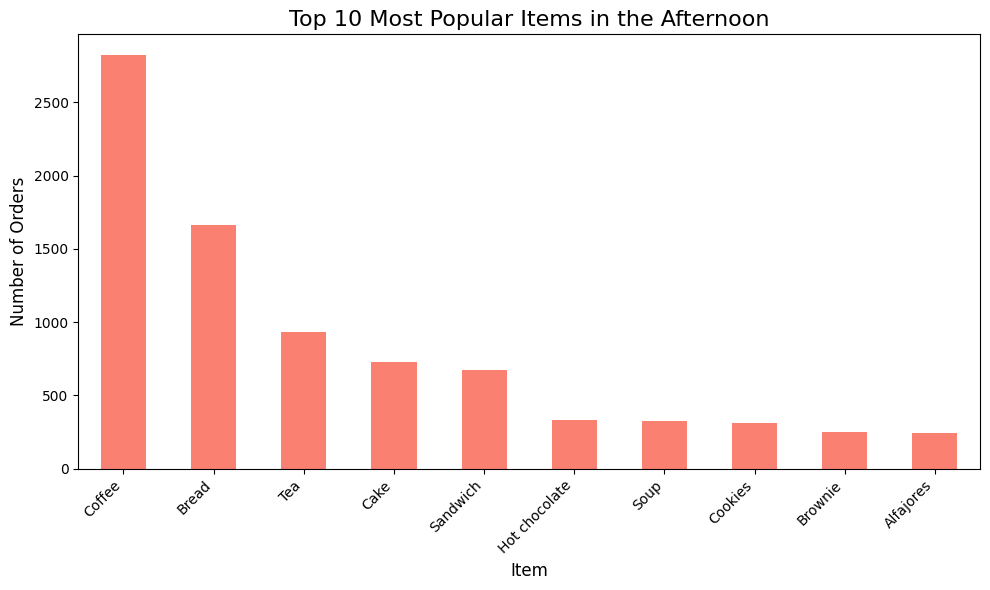

In [48]:
# Filter data for the 'afternoon' period
afternoon_sales = df[df['period_day'] == 'afternoon']

# Count the frequency of orders for each item in the afternoon
afternoon_item_counts = afternoon_sales['Item'].value_counts()

# Get the top 10 most popular items in the afternoon
top_10_afternoon_items = afternoon_item_counts.head(10)

# Plot the bar chart for top 10 items in the afternoon
plt.figure(figsize=(10, 6))
top_10_afternoon_items.plot(kind='bar', color='salmon')

# Add title and labels
plt.title('Top 10 Most Popular Items in the Afternoon', fontsize=16)
plt.xlabel('Item', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


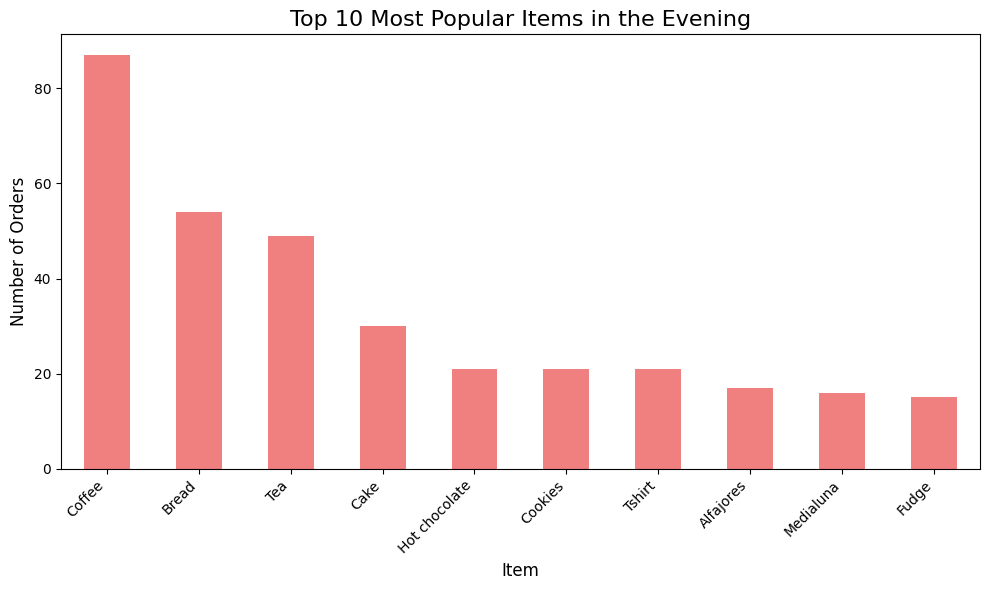

In [49]:
# Filter data for the 'evening' period
evening_sales = df[df['period_day'] == 'evening']

# Count the frequency of orders for each item in the evening
evening_item_counts = evening_sales['Item'].value_counts()

# Get the top 10 most popular items in the evening
top_10_evening_items = evening_item_counts.head(10)

# Plot the bar chart for top 10 items in the evening
plt.figure(figsize=(10, 6))
top_10_evening_items.plot(kind='bar', color='lightcoral')

# Add title and labels
plt.title('Top 10 Most Popular Items in the Evening', fontsize=16)
plt.xlabel('Item', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


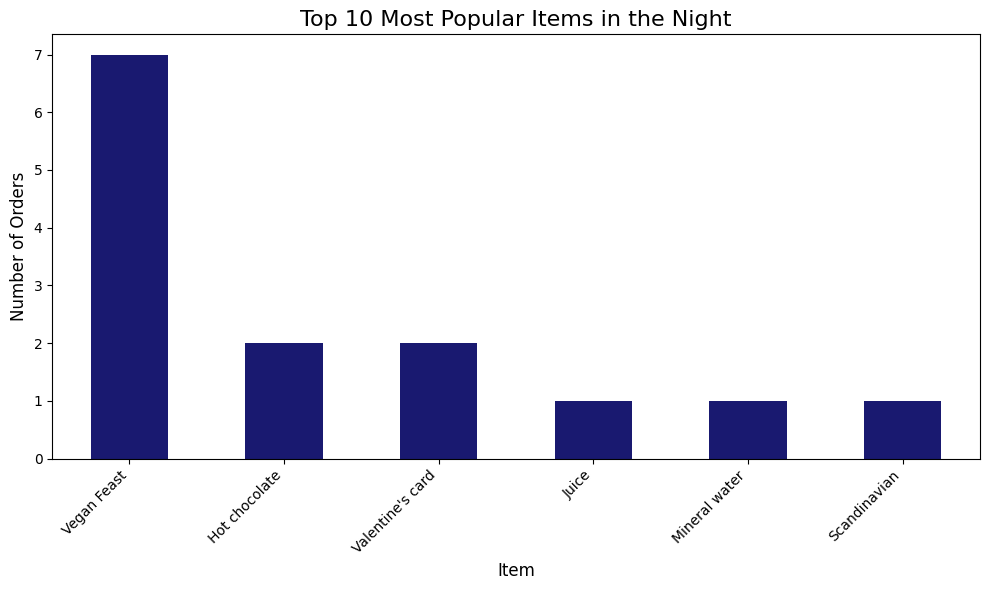

In [50]:
# Filter data for the 'night' period
night_sales = df[df['period_day'] == 'night']

# Count the frequency of orders for each item in the night
night_item_counts = night_sales['Item'].value_counts()

# Get the top 10 most popular items in the night
top_10_night_items = night_item_counts.head(10)

# Plot the bar chart for top 10 items in the night
plt.figure(figsize=(10, 6))
top_10_night_items.plot(kind='bar', color='midnightblue')

# Add title and labels
plt.title('Top 10 Most Popular Items in the Night', fontsize=16)
plt.xlabel('Item', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


21. It turns out that there is something different in the plot above, the insight is ____


It turns out that there is something different in the plot above, the insight is that the top 10 most popular items vary significantly across different periods of the day.

depending on whether it's morning, afternoon, evening, or night. This indicates that:
- In the morning, customers may prefer items like coffee, pastries, or breakfast foods, which are often consumed in the early part of the day.
- During the afternoon, people might gravitate towards lunch items like sandwiches or salads, aligning with typical lunchtime cravings.
- In the evening, there's likely a shift toward desserts, baked goods, or perhaps heavier snacks that customers enjoy after work or dinner.
- The night period may showcase more light meals or comfort food, catering to customers who may be looking for a late-night snack or a smaller meal before bed.

I found a valentine card, I was curious about when people bought it so I made a visualization of it

C:\Users\Rangga R\AppData\Local\Temp\ipykernel_16376\3726523140.py:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  valentine_sales['date'] = pd.to_datetime(valentine_sales['date_time']).dt.date
C:\Users\Rangga R\AppData\Local\Temp\ipykernel_16376\3726523140.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valentine_sales['date'] = pd.to_datetime(valentine_sales['date_time']).dt.date


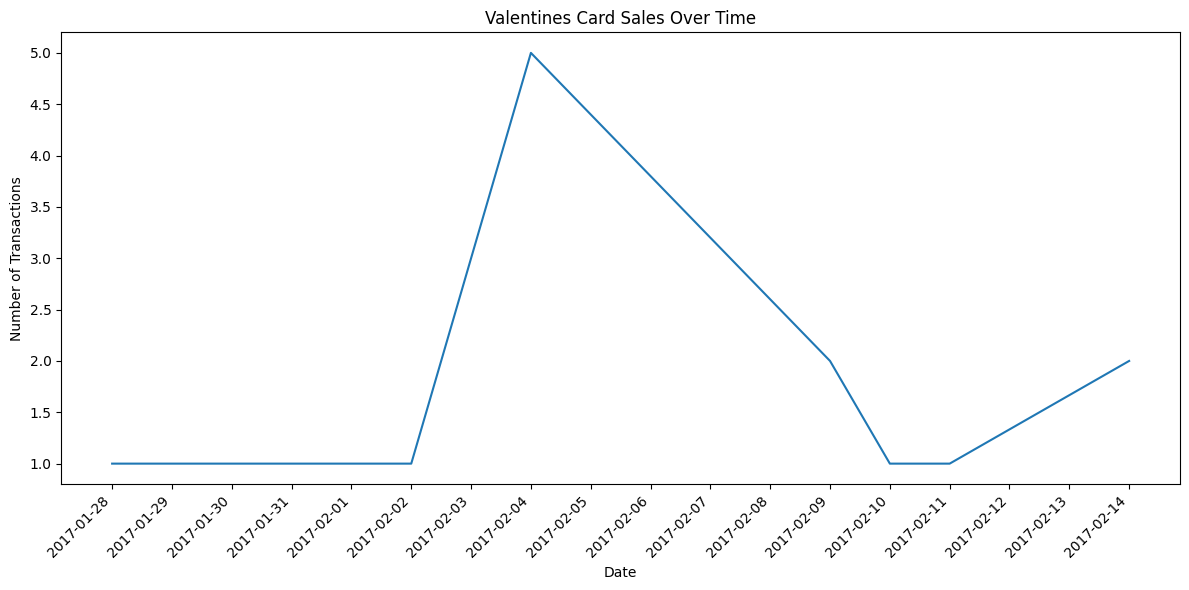

<Figure size 640x480 with 0 Axes>

In [53]:
valentine_sales = df[df['Item'].str.contains('Valentine', case=False, na=False)] 

valentine_sales['date'] = pd.to_datetime(valentine_sales['date_time']).dt.date 
sales_by_date = valentine_sales.groupby('date').size()

plt.figure(figsize=(12, 6))
plt.plot(sales_by_date.index, sales_by_date.values, linestyle='-', label='Valentine Card Sales')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1)) # Adjust interval as needed
plt.gcf().autofmt_xdate()

plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Valentines Card Sales Over Time')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


# Show the plot
plt.tight_layout()
plt.show()

23. I found the insight from the sale of the Valentine's cards above is ____


The sales of Valentine's cards exhibit a clear spike just before Valentine's Day (around February 14th). This suggests that:

- Peak sales occur as the holiday approaches, reflecting a common consumer behavior where people purchase cards closer - to the event.
- The trend indicates that Valentine's cards are most popular in the days leading up to and on Valentine's Day itself.
- Sales may be lower in the days following the holiday, which could be attributed to the seasonal nature of card sales, particularly for special holidays.

## **Applying the Apriori Algorithm**
With a solid understanding of the data, I shift my focus to identifying associations between items using the Apriori algorithm.

### **Data Preparation for Apriori**
I need to transform the dataset into a format suitable for the Apriori algorithm, where each transaction is represented as a row and each item as a column.

In [55]:
# 24
apriori_data = pd.crosstab(df['Transaction'], df['Item'])
apriori_data.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
#25
# Convert quantities to 1 and 0
basket_encoded = apriori_data.applymap(lambda x: 1 if x > 0 else 0)
basket_encoded.head()

C:\Users\Rangga R\AppData\Local\Temp\ipykernel_16376\3069232821.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = apriori_data.applymap(lambda x: 1 if x > 0 else 0)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
# 26
frequent_itemsets = apriori(basket_encoded, min_support=0.02, use_colnames=True)

# Create a DataFrame with 'support' and 'itemsets' columns
frequent_itemsets_df = frequent_itemsets[['support', 'itemsets']]

# Display the DataFrame
display(frequent_itemsets_df)

C:\Anaconda\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.036344,(Alfajores)
1,0.327205,(Bread)
2,0.040042,(Brownie)
3,0.103856,(Cake)
4,0.478394,(Coffee)
5,0.054411,(Cookies)
6,0.039197,(Farm House)
7,0.058320,(Hot chocolate)
8,0.038563,(Juice)
9,0.061807,(Medialuna)


### **Finding Frequent Itemsets**
Now, I apply the Apriori algorithm to find frequent itemsets with a minimum support threshold. This will help identify combinations of items that are frequently purchased together. (min_support=0.02, metric="lift", min_threshold=1)

In [58]:
# 27
# Apply Apriori algorithm
frequent_itemsets = apriori(basket_encoded, min_support=0.02, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the association rules
display(rules)

C:\Anaconda\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
1,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306,0.050231
2,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
3,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
4,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556
5,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538
6,(Coffee),(Cookies),0.478394,0.054411,0.028209,0.058966,1.083723,0.002179,1.004841,0.148110
7,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
8,(Coffee),(Hot chocolate),0.478394,0.058320,0.029583,0.061837,1.060311,0.001683,1.003749,0.109048
9,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403


## Conclusion: The Impact of Data Analysis
28. As my day of analysis comes to a close, I compile my findings into a comprehensive report that highlights several key insights derived from The Bread Basket dataset:



Peak Sales Periods: Transactions peak in the afternoon and morning periods, with weekends (Saturday and Sunday) showing higher activity than weekdays.

Top-Selling Items: Bread, Coffee, and Pastry are the most popular items, with Tea, Brownie, and Cookies also showing strong demand.

Frequent Item Combinations: Using the Apriori algorithm, item combinations like Coffee and Cake, Bread and Pastry, and Coffee and Cookies were frequently purchased together, suggesting opportunities for product bundling.

Association Rules: Items like Coffee and Cake have a high confidence level (52.7%), indicating strong correlations for cross-selling.

Weekend Trends: Weekends consistently show higher transaction volumes, suggesting targeted promotions during these periods could boost sales.